In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from statsmodels.tsa.arima.model import ARIMA
from textstat import flesch_reading_ease

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

!pip install textstat

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\projectd\Data_Project1.csv")

In [3]:
data['Date1'] = pd.to_datetime(data['Date1'])
data.set_index('Date1', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10580\1380525026.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date1'] = pd.to_datetime(data['Date1'])


In [4]:
# Step 2: Text Analysis
text_data = data['Status text']

# Tokenization
tokens = [word_tokenize(text) for text in text_data]

# Lowercasing
tokens_lower = [[token.lower() for token in text] for text in tokens]

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [[token for token in text if token not in stop_words] for text in tokens_lower]

In [5]:
token_strings = [' '.join(tokens) for tokens in filtered_tokens]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(token_strings)
tfidf_scores = tfidf_matrix.toarray()

In [6]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(text)['compound'] for text in text_data]

In [7]:
word_frequency = [len(tokens) for tokens in filtered_tokens]
lexical_diversity = [len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0 for tokens in filtered_tokens]
readability_scores = [flesch_reading_ease(' '.join(tokens)) for tokens in filtered_tokens]


In [8]:
data['TF-IDF Score'] = np.mean(tfidf_scores, axis=1)
data['Sentiment Score'] = sentiment_scores
data['Word Frequency'] = word_frequency
data['Lexical Diversity'] = lexical_diversity
data['Readability Score'] = readability_scores
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
daily_data = data[numeric_columns].resample('D').mean()  # Aggregate by day

In [9]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Drop rows with any missing values
daily_data.dropna(inplace=True)

In [10]:
daily_data

,Sno,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,...,discrep,certitude,Positive,Negative,Total_Sentiment,TF-IDF Score,Sentiment Score,Word Frequency,Lexical Diversity,Readability Score
Date1,,,,,,,,,,,,,,,,,,,,,
2019-01-04,12726.789474,233.736842,39.789474,4.157895,457.894737,2.000000,585.578947,590318.842105,38.894737,57.730000,...,0.146316,0.000000,1.368421,-1.0000,0.368421,0.000067,0.559868,31.315789,0.853218,41.831053
2019-01-05,11142.562500,165.687500,12.562500,2.437500,71.187500,1.750000,113.750000,786463.062500,38.750000,71.108125,...,0.389375,0.255000,1.812500,-1.0625,0.875000,0.000066,0.628581,30.000000,0.838886,29.666250
2019-01-06,11980.625000,410.562500,10.437500,1.500000,79.375000,0.687500,113.687500,718648.687500,38.187500,66.055625,...,0.156250,0.120000,1.625000,-1.1250,0.750000,0.000068,0.584888,30.000000,0.855479,36.605000
2019-01-07,11234.588235,418.352941,13.117647,2.411765,87.529412,2.117647,131.705882,613932.529412,41.411765,57.515294,...,0.228235,0.278824,1.235294,-1.0000,0.235294,0.000070,0.453982,34.647059,0.815622,38.502353
2019-01-08,11531.200000,511.933333,11.333333,1.533333,68.333333,1.333333,105.400000,714429.866667,42.266667,60.660667,...,0.388000,0.138667,1.200000,-1.2000,0.400000,0.000070,0.426693,32.600000,0.888360,42.952667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,12303.913043,1452.478261,28.652174,13.565217,183.695652,1.521739,296.782609,349695.043478,44.260870,68.911304,...,0.000000,0.401304,1.173913,-1.0000,0.173913,0.000068,0.575813,39.913043,0.811438,39.493913
2022-09-01,11500.782609,1614.956522,32.043478,12.521739,200.304348,2.826087,321.478261,481812.478261,52.217391,73.893913,...,0.782609,0.000000,1.173913,-1.0000,0.173913,0.000069,0.655539,52.260870,0.748124,49.932609
2022-10-01,11275.538462,1332.615385,26.653846,3.192308,186.615385,1.730769,272.961538,412556.961538,42.346154,66.122308,...,0.290000,0.651538,1.153846,-1.0000,0.153846,0.000068,0.517308,39.846154,0.789234,36.450769


In [11]:
columns_to_keep = {"TF-IDF Score",	"Sentiment Score",	"Word Frequency",	"Lexical Diversity",	"Readability Score"}
newdata = daily_data.drop(columns=daily_data.columns.difference(columns_to_keep))

In [12]:
newdata

,TF-IDF Score,Sentiment Score,Word Frequency,Lexical Diversity,Readability Score
Date1,,,,,
2019-01-04,0.000067,0.559868,31.315789,0.853218,41.831053
2019-01-05,0.000066,0.628581,30.000000,0.838886,29.666250
2019-01-06,0.000068,0.584888,30.000000,0.855479,36.605000
2019-01-07,0.000070,0.453982,34.647059,0.815622,38.502353
2019-01-08,0.000070,0.426693,32.600000,0.888360,42.952667
...,...,...,...,...,...
2022-08-01,0.000068,0.575813,39.913043,0.811438,39.493913
2022-09-01,0.000069,0.655539,52.260870,0.748124,49.932609
2022-10-01,0.000068,0.517308,39.846154,0.789234,36.450769


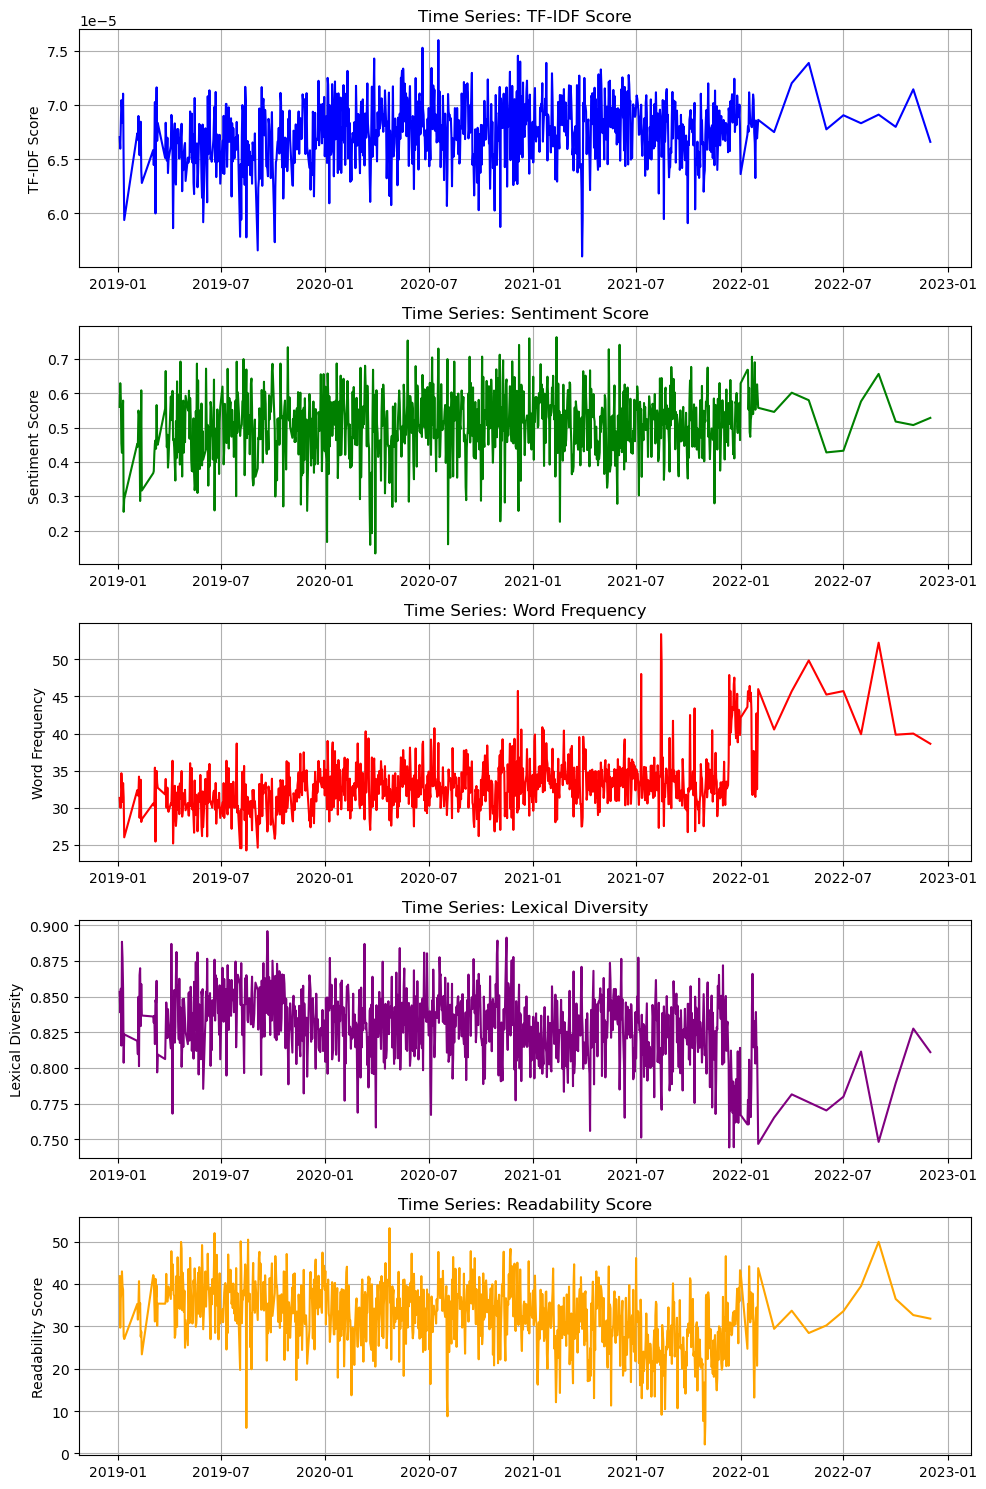

In [13]:
import matplotlib.pyplot as plt

# Plotting time series for each metric
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

metrics = ['TF-IDF Score', 'Sentiment Score', 'Word Frequency', 'Lexical Diversity', 'Readability Score']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(newdata.index, newdata[metric], color=colors[i])
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.set_title(f'Time Series: {metric}')

plt.tight_layout()
plt.show()


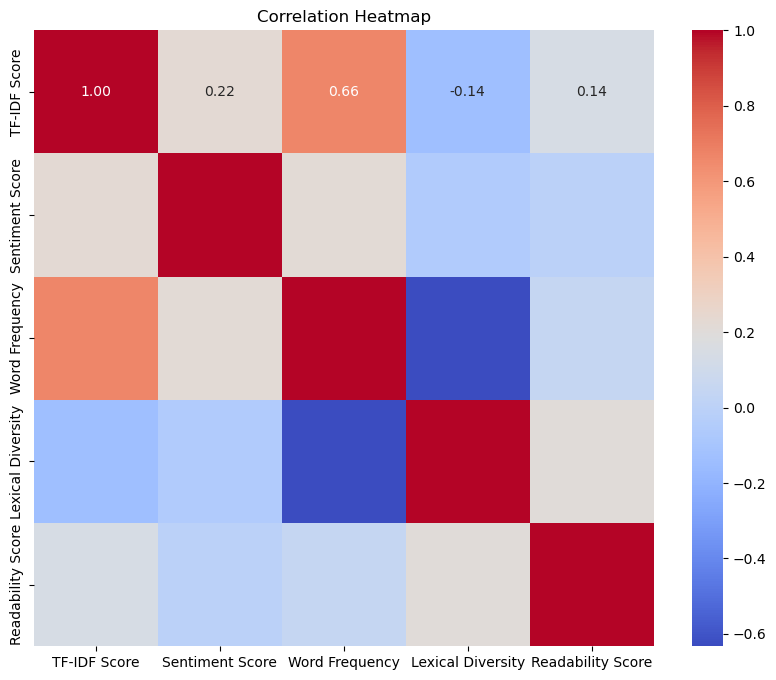

In [14]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = newdata[['TF-IDF Score', 'Sentiment Score', 'Word Frequency', 'Lexical Diversity', 'Readability Score']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('5.png')
plt.show()


In [35]:
!pip install scikit-learn

from sklearn.ensemble import IsolationForest

# Assuming 'df' is your DataFrame with DateTimeIndex and metrics columns
# Combine all metrics into a single DataFrame
metrics_df = newdata[['TF-IDF Score', 'Sentiment Score', 'Word Frequency', 'Lexical Diversity', 'Readability Score']]

# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed

# Fit the model and predict anomalies
isolation_forest.fit(metrics_df)
anomaly_labels = isolation_forest.predict(metrics_df)
anomalies = metrics_df[anomaly_labels == -1]
anomaly_scores = isolation_forest.decision_function(metrics_df)
threshold=0.12
anomalies_below_threshold = metrics_df[anomaly_scores < threshold]
print("Anomaly Scores:")
print(anomaly_scores)
print("Anomalies below threshold of 0.12:")
print(anomalies_below_threshold)


Anomalies below threshold of 0.12:
            TF-IDF Score  Sentiment Score  Word Frequency  Lexical Diversity  \
Date1                                                                          
2019-01-08      0.000070         0.426693       32.600000           0.888360   
2019-01-09      0.000068         0.528814       30.785714           0.876998   
2019-01-11      0.000064         0.255388       31.411765           0.803614   
2019-01-12      0.000059         0.292470       26.000000           0.823489   
2019-02-09      0.000067         0.286792       30.560000           0.869822   
...                  ...              ...             ...                ...   
2022-07-01      0.000069         0.432681       45.730769           0.779767   
2022-08-01      0.000068         0.575813       39.913043           0.811438   
2022-09-01      0.000069         0.655539       52.260870           0.748124   
2022-10-01      0.000068         0.517308       39.846154           0.789234   
2022-

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


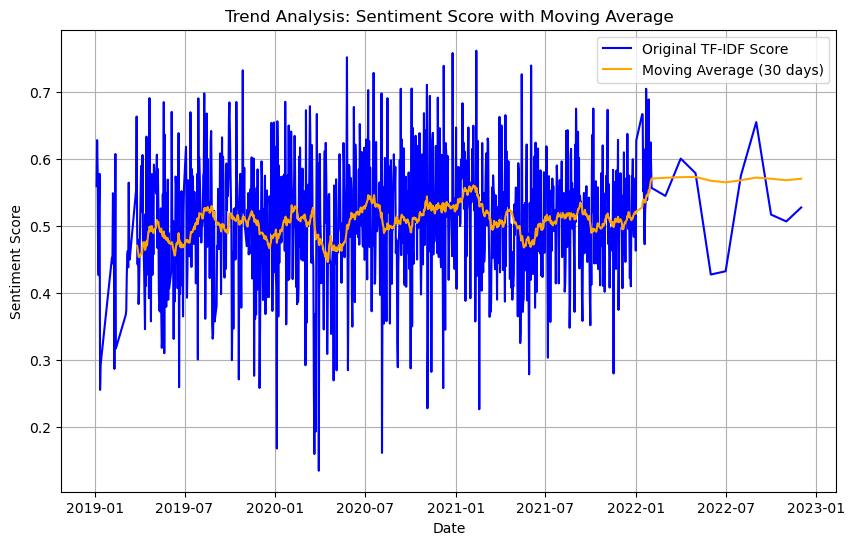

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your time series data is stored in a DataFrame named 'newdata' with a DateTimeIndex
# Let's focus on one metric, for example, 'TF-IDF Score'

# Calculate the rolling mean (moving average) over a specific window size
window_size = 30  # Adjust this window size based on your data frequency
newdata['Sentiment Score MA'] = newdata['Sentiment Score'].rolling(window=window_size).mean()

# Plotting the original TF-IDF Score and its moving average
plt.figure(figsize=(10, 6))
plt.plot(newdata.index, newdata['Sentiment Score'], label='Original TF-IDF Score', color='blue')
plt.plot(newdata.index, newdata['Sentiment Score MA'], label=f'Moving Average ({window_size} days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Trend Analysis: Sentiment Score with Moving Average')
plt.legend()
plt.grid(True)
plt.savefig('7.png')
plt.show()


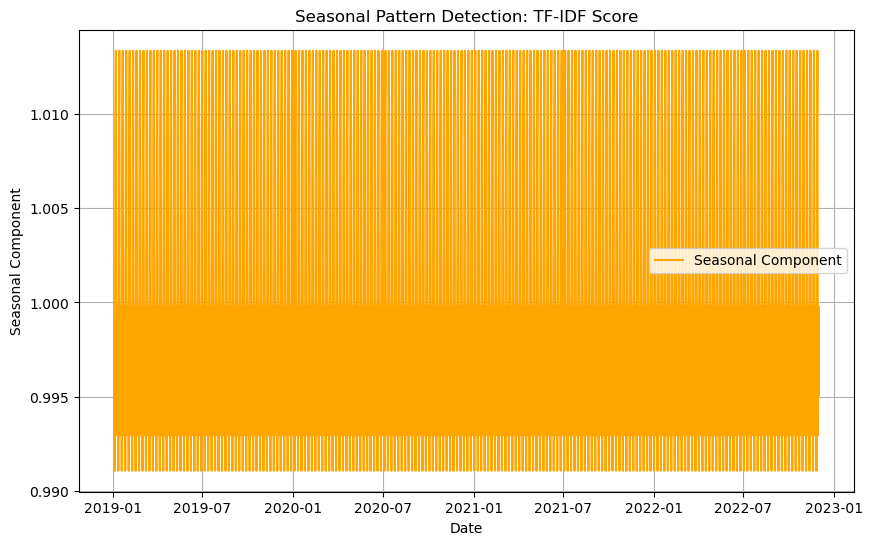

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your time series data is stored in a DataFrame named 'newdata' with a DateTimeIndex
# Handle missing values in the DataFrame by interpolating
newdata_interpolated = newdata.interpolate(method='linear')

# Perform seasonal decomposition using multiplicative model on the interpolated data
result = seasonal_decompose(newdata_interpolated['Sentiment Score'], model='multiplicative')

# Plotting the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(result.seasonal.index, result.seasonal.values, label='Seasonal Component', color='orange')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Pattern Detection: TF-IDF Score')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
pip install prophet


  Using cached holidays-0.45-py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 660.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.2/13.3 MB 1.5 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 1.9 MB/s eta 0:00:07
   - -------------------------------------- 0.6/13.3 MB 2.1 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/13.3 MB 2.2 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/13.3 MB 2.2 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/13.3 MB 2.3 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/13.3 MB 2.3 MB/s eta 0:00:06
   --- ------------------------------------ 1.2/13.3 MB 2.3 MB/s eta 0:00:06
   --- -----------

In [60]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


# Assuming you have a DataFrame named 'newdata' with a DateTimeIndex and a metric 'Value'
# Replace 'Value' with your actual metric name
if 'level_0' in newdata.columns:
    newdata.drop(columns=['level_0'], inplace=True)

# Reset the index of newdata if DateTimeIndex is not in 'ds' format
newdata.reset_index(inplace=True)
newdata.rename(columns={'Date1': 'ds', 'Sentiment Score': 'y'}, inplace=True)

# Initialize and fit Prophet model
model_prophet = Prophet()
model_prophet.fit(newdata)

# Make future predictions
future = model_prophet.make_future_dataframe(periods=30)  # Example periods for forecasting
forecast_prophet = model_prophet.predict(future)

# Print the forecasted values
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

21:56:06 - cmdstanpy - INFO - Chain [1] start processing
21:56:06 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
1453 2022-12-27  0.562086    0.458480    0.675187
1454 2022-12-28  0.566882    0.457443    0.678247
1455 2022-12-29  0.565837    0.455316    0.672937
1456 2022-12-30  0.570038    0.463458    0.675886
1457 2022-12-31  0.567696    0.457694    0.673610


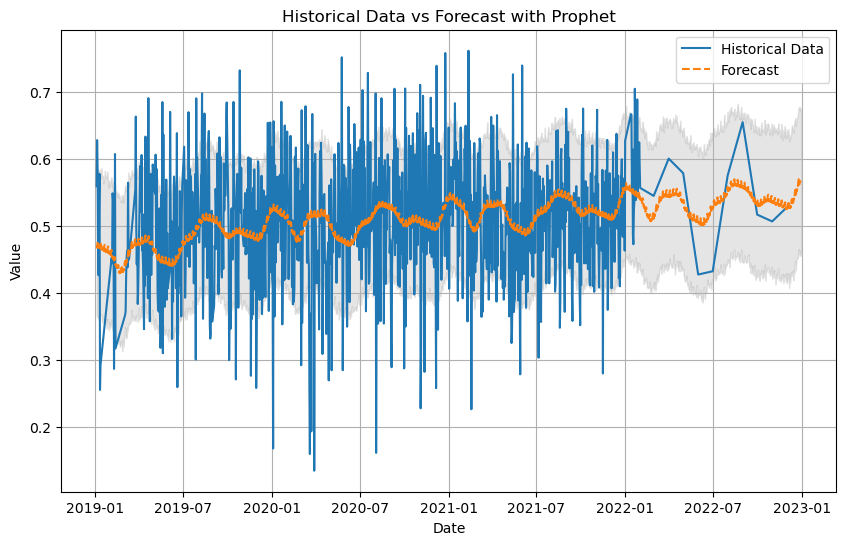

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(newdata['ds'], newdata['y'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Forecast', linestyle='--')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Historical Data vs Forecast with Prophet')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(newdata['y'], forecast_prophet['yhat'][:len(newdata)])

print(f"Mean Absolute Error (MAE): {mae:.2f}")



Mean Absolute Error (MAE): 0.06


In [65]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1205
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0212
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0210
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0216
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0210
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0209
Epoch 16/50
36/36 ━━━━

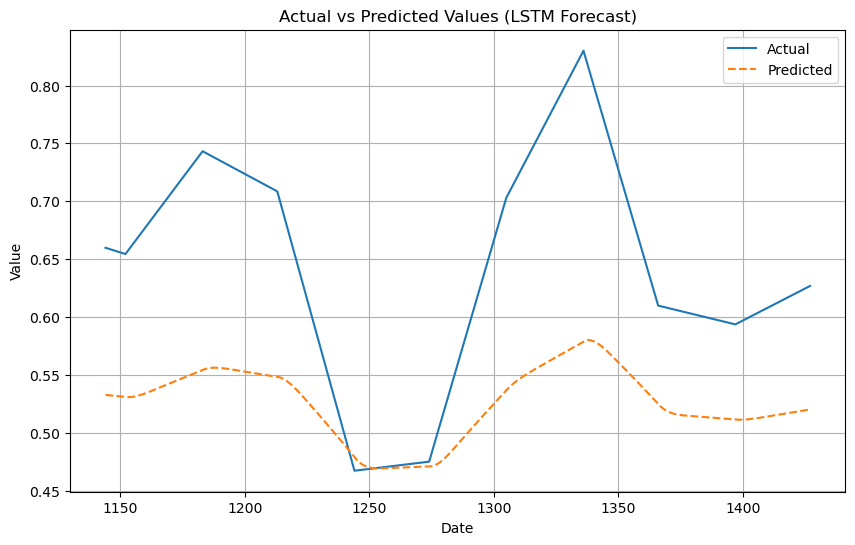

[[0.53261065]
 [0.5323985 ]
 [0.5321864 ]
 [0.53197414]
 [0.53176177]
 [0.5315494 ]
 [0.53133696]
 [0.5311244 ]
 [0.53091186]
 [0.5306992 ]
 [0.5307496 ]
 [0.53099716]
 [0.5313986 ]
 [0.53191984]
 [0.5325359 ]
 [0.53322923]
 [0.53398633]
 [0.5347966 ]
 [0.5356514 ]
 [0.536544  ]
 [0.53743523]
 [0.5383253 ]
 [0.53921413]
 [0.5401016 ]
 [0.5409878 ]
 [0.5418728 ]
 [0.54275644]
 [0.54363894]
 [0.5445201 ]
 [0.5454    ]
 [0.5462787 ]
 [0.5471561 ]
 [0.5480323 ]
 [0.5489072 ]
 [0.5497809 ]
 [0.5506534 ]
 [0.55152464]
 [0.55239457]
 [0.5532633 ]
 [0.5541308 ]
 [0.55499715]
 [0.555559  ]
 [0.5559034 ]
 [0.55608106]
 [0.55613106]
 [0.55608   ]
 [0.555947  ]
 [0.55574614]
 [0.55548817]
 [0.55518174]
 [0.5548338 ]
 [0.5544857 ]
 [0.55413735]
 [0.55378884]
 [0.55344015]
 [0.55309117]
 [0.55274206]
 [0.5523927 ]
 [0.5520432 ]
 [0.55169356]
 [0.55134356]
 [0.5509935 ]
 [0.55064315]
 [0.5502927 ]
 [0.5499419 ]
 [0.549591  ]
 [0.54923993]
 [0.5488886 ]
 [0.548537  ]
 [0.54818535]
 [0.5478334 ]
 [0.54

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

if 'level_0' in newdata.columns:
    newdata.drop(columns=['level_0'], inplace=True)

# Assuming you have a DataFrame named 'newdata' with a DateTimeIndex and a metric 'Value'
# Replace 'Value' with your actual metric name

# Reset the index of newdata if DateTimeIndex is not in 'ds' format
newdata.reset_index(inplace=True)
newdata.rename(columns={'Date1': 'ds', 'Sentiment Score': 'y'}, inplace=True)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(newdata['y'].values.reshape(-1, 1))

# Define the sequence length for input data
sequence_length = 10  # You can adjust this based on your data and requirements

# Create sequences of input data and corresponding labels
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions with the trained model
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(newdata.index[split_index+sequence_length:], y_test, label='Actual')
plt.plot(newdata.index[split_index+sequence_length:], predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (LSTM Forecast)')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted values
print(predictions)


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.0179
Mean Absolute Error (MAE): 0.1165
